## Analysis for Surprise Housing to enter Australian market

Company wants to make profits by purchasing houses at lower prices and sell at a higher price.

`Dataset:` sale of houses in Australia of period 2006-2010

`Target variable:` SalePrice      

`Aim` Explainability of model is important, hence Linear regression is performed with regularization techniques.

In [101]:
#import all common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

#### Load data

In [102]:
housing_sales_data = pd.read_csv('train.csv', index_col='Id')

In [103]:
housing_sales_data.shape

(1460, 80)

In [104]:
housing_sales_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
housing_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [106]:
housing_sales_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000000,1201.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1452.000000000,1460.000000000,1460.000000000,...,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000,1460.000000000
mean,56.897260274,70.049958368,10516.828082192,6.099315068,5.575342466,1971.267808219,1984.865753425,103.685261708,443.639726027,46.549315068,...,94.244520548,46.660273973,21.954109589,3.409589041,15.060958904,2.758904110,43.489041096,6.321917808,2007.815753425,180921.195890411
std,42.300570994,24.284751774,9981.264932379,1.382996547,1.112799337,30.202904043,20.645406808,181.066206587,456.098090841,161.319272807,...,125.338794352,66.256027677,61.119148602,29.317330557,55.757415282,40.177306945,496.123024458,2.703626208,1.328095121,79442.502882887
min,20.000000000,21.000000000,1300.000000000,1.000000000,1.000000000,1872.000000000,1950.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,2006.000000000,34900.000000000
25%,20.000000000,59.000000000,7553.500000000,5.000000000,5.000000000,1954.000000000,1967.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,5.000000000,2007.000000000,129975.000000000
50%,50.000000000,69.000000000,9478.500000000,6.000000000,5.000000000,1973.000000000,1994.000000000,0.000000000,383.500000000,0.000000000,...,0.000000000,25.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,6.000000000,2008.000000000,163000.000000000
75%,70.000000000,80.000000000,11601.500000000,7.000000000,6.000000000,2000.000000000,2004.000000000,166.000000000,712.250000000,0.000000000,...,168.000000000,68.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,8.000000000,2009.000000000,214000.000000000
max,190.000000000,313.000000000,215245.000000000,10.000000000,9.000000000,2010.000000000,2010.000000000,1600.000000000,5644.000000000,1474.000000000,...,857.000000000,547.000000000,552.000000000,508.000000000,480.000000000,738.000000000,15500.000000000,12.000000000,2010.000000000,755000.000000000


In [107]:
housing_sales_data[~housing_sales_data.PoolQC.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.000000000,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
811,20,RL,78.000000000,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1171,80,RL,76.000000000,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1183,60,RL,160.000000000,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.000000000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1387,60,RL,80.000000000,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [108]:
# Data availability is < 1%. We do not have enough data of PoolQc, hence drop it.
housing_sales_data.drop(['PoolQC'], axis=1, inplace=True)

#### Sanity check

In [109]:
# check if there exists any column with all Nan
housing_sales_data.columns[housing_sales_data.isna().all()]

Index([], dtype='object')

In [110]:
housing_sales_data.shape

(1460, 79)

In [111]:
# clean the data for safe checks like empty columns and empty rows...
def sanity_clean_data(housing_sales_data):
    #columns with all empty values to be removed
    housing_sales_data.dropna(axis=1, how='all', inplace=True)
    
    #columns with all same values to be removed as they dont provide any insight
    cols_nounique = [i for i in housing_sales_data.columns if housing_sales_data[i].nunique()==1]
    housing_sales_data.drop(columns=cols_nounique, inplace=True, axis=1)
    print(cols_nounique)
    
    #rows with all NAs to be removed
    housing_sales_data.dropna(axis=0,how='all',inplace=True)
    
sanity_clean_data(housing_sales_data)    

[]


In [112]:
housing_sales_data.shape

(1460, 79)

#### Data Mapping from data dictionary & outlier analysis:

In [113]:
# MSSubClass is a categorical but input is numberic. let's convert to string
housing_sales_data.MSSubClass = housing_sales_data.MSSubClass.apply(lambda x: str(x))

In [114]:
housing_sales_data.MSSubClass.describe()

count     1460
unique      15
top         20
freq       536
Name: MSSubClass, dtype: object

<AxesSubplot:>

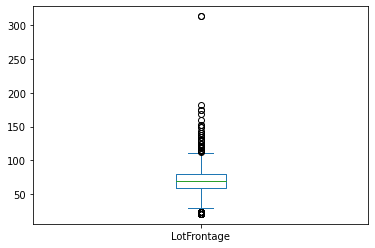

In [115]:
housing_sales_data.LotFrontage.plot.box()

<AxesSubplot:>

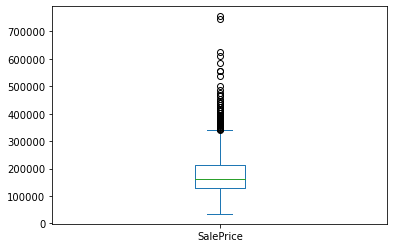

In [116]:
housing_sales_data.SalePrice.plot.box()

In [117]:
#looks like there are some outliers, distribution is little right tailed
housing_sales_data[housing_sales_data.SalePrice > housing_sales_data.SalePrice.quantile(0.995)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
441,20,RL,105.000000000,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,...,170,0,NaN,NaN,0,4,2009,WD,Normal,555000
692,60,RL,104.000000000,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,1,2007,WD,Normal,755000
770,60,RL,47.000000000,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,...,210,0,NaN,NaN,0,6,2010,WD,Normal,538000
804,60,RL,107.000000000,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,192,0,NaN,NaN,0,1,2009,New,Partial,582933
899,20,RL,100.000000000,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,3,2010,New,Partial,611657
1047,60,RL,85.000000000,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,7,2006,New,Partial,556581
1170,60,RL,118.000000000,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,0,7,2006,WD,Normal,625000
1183,60,RL,160.000000000,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,555,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [118]:
# lets remove these outliers that are very evident
housing_sales_data = housing_sales_data[housing_sales_data.SalePrice < housing_sales_data.SalePrice.quantile(0.995)]

<AxesSubplot:>

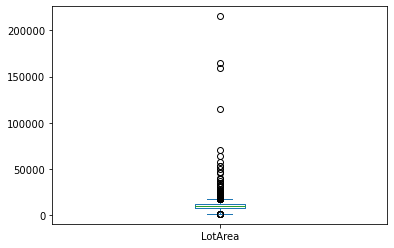

In [119]:
housing_sales_data.LotArea.plot.box()

In [120]:
housing_sales_data.shape

(1452, 79)

In [121]:
# NA for alley have a meaning. so can't be treated as NA. hence replace it with NotApplicable
housing_sales_data.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [122]:
housing_sales_data.Alley = housing_sales_data.Alley.fillna(value='NotApplicable')
#same with MiscFeature
housing_sales_data.MiscFeature = housing_sales_data.MiscFeature.fillna(value='NotApplicable')
#same with Fence
housing_sales_data.Fence = housing_sales_data.Fence.fillna(value='NotApplicable')

<AxesSubplot:>

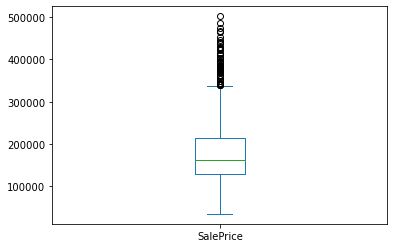

In [123]:
housing_sales_data.SalePrice.plot.box()

In [124]:
# MSSubclass is numeric but it should be categorical.
housing_sales_data['MSSubClass'] = housing_sales_data['MSSubClass'].apply(lambda x: str(x))


In [125]:
housing_sales_data.LotShape.value_counts()

Reg    923
IR1    479
IR2     40
IR3     10
Name: LotShape, dtype: int64

In [126]:
# this is ordered categorical, we can map these to numeric.
housing_sales_data.LotShape = housing_sales_data.LotShape.map({
    "Reg": 4,
    "IR1": 3,
    "IR2": 2,
    "IR3": 1
})

In [127]:
housing_sales_data.Utilities.value_counts()

AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64

In [128]:
# we removed some outliers, lets do sanity clean again    
sanity_clean_data(housing_sales_data) 

[]


In [129]:
housing_sales_data.LotConfig.value_counts()

Inside     1048
Corner      261
CulDSac      92
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [130]:
# since condition 1, condition 2 are same, we can join them together and get dummies as combined 
housing_sales_data.Condition = housing_sales_data.Condition1 + ',' + housing_sales_data.Condition2
housing_sales_data.Condition.apply(lambda x: str(x))
housing_sales_data.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

In [131]:
housing_sales_data.Condition.dtype

dtype('O')

In [132]:
condition_dummies = housing_sales_data.Condition.str.get_dummies(sep=',').add_prefix('Condition_')
housing_sales_data = pd.concat([housing_sales_data, condition_dummies], axis=1)

In [133]:
housing_sales_data.HouseStyle.value_counts()

1Story    724
2Story    439
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [134]:
#We can have a derived metric for number of floors based on HouseStyle and BldgType which can give almost 90% of data.
# this could be a good derived metric
housing_sales_data['HouseStyleFloorsMap'] = housing_sales_data.HouseStyle.map({
    "1Story": 1,
    "1.5Fin": 1.5,
    "1.5Unf": 1.5,
    "2Story": 2,
    "2.5Fin": 2.5,
    "2.5Unf": 2.5,
    "SFoyer": 0,
    "SLvl":	0
})
housing_sales_data['BldgTypeFloorsMap'] = housing_sales_data.BldgType.map(
    {
    "1Fam": 1,
    "2fmCon": 1.5,	
    "Duplex": 2,
    "Twnhs":3,
    "TwnhsE": 3
    }
)
housing_sales_data['Floors'] = housing_sales_data[['HouseStyleFloorsMap','BldgTypeFloorsMap']].apply(lambda x: x['HouseStyleFloorsMap'] if x['HouseStyleFloorsMap']>0 else x['BldgTypeFloorsMap'], axis=1)


In [135]:
housing_sales_data.Floors.value_counts()

1.000000000    804
2.000000000    449
1.500000000    169
2.500000000     19
3.000000000     11
Name: Floors, dtype: int64

In [136]:
housing_sales_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'E

<AxesSubplot:ylabel='Frequency'>

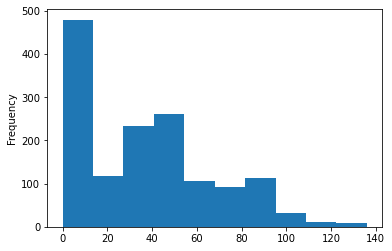

In [137]:
# We can also derive age of house, age since renovation.
housing_sales_data['Age'] = housing_sales_data.YrSold - housing_sales_data.YearBuilt
housing_sales_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

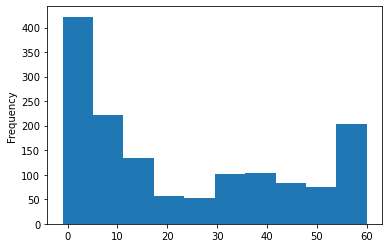

In [138]:

housing_sales_data['AgeRemod'] = housing_sales_data.YrSold - housing_sales_data.YearRemodAdd
housing_sales_data['AgeRemod'].plot.hist()

In [139]:
housing_sales_data.Exterior1st.value_counts()

VinylSd    512
MetalSd    220
HdBoard    220
Wd Sdng    205
Plywood    108
CemntBd     59
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [140]:
housing_sales_data.Exterior2nd.value_counts()

VinylSd    501
MetalSd    214
HdBoard    205
Wd Sdng    197
Plywood    142
CmentBd     59
Wd Shng     37
Stucco      26
BrkFace     25
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [141]:
#BrkComm and Brk Cmn are same so refactor
# similarly WdSHng and Cment Bd are mistyped
housing_sales_data.Exterior2nd = housing_sales_data.Exterior2nd.apply(lambda x: "BrkComm" if x=='Brk Cmn' else x)
housing_sales_data.Exterior2nd = housing_sales_data.Exterior2nd.apply(lambda x: "WdShing" if x=="Wd Shng" else x)
housing_sales_data.Exterior2nd = housing_sales_data.Exterior2nd.apply(lambda x: "CemntBd" if x=='CmentBd' else x)

# Exterior1st and Exterior2nd must be merged together and then dummies should be created.
housing_sales_data.Exterior = housing_sales_data.Exterior1st + ',' + housing_sales_data.Exterior2nd
housing_sales_data.Exterior.apply(lambda x: str(x).lower())
housing_sales_data.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)
exterior_dummies = housing_sales_data.Exterior.str.get_dummies(sep=',').add_prefix('Exterior_')
housing_sales_data = pd.concat([housing_sales_data, exterior_dummies], axis=1)

In [142]:
housing_sales_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'Exterior_HdBoard', 'Exterior_ImStucc', 'Exterior_MetalSd',
       'Exterior_Other', 'Exterior_Plywood', 'Exterior_Stone',
       'Exterior_Stucco', 'Exterior_VinylSd', 'Exterior_Wd Sdng',
       'Exterior_WdShing'],
      dtype='object', length=105)

In [143]:
#since ExterQual, ExterCond is ordered categorical, we can convert to numeric
# NA -> not applicable -> this happens when feature is not avaiable. hence giving zero weight for NA
ordered_quality_map = {
     "Ex": 5,
     "Gd": 4,
     "TA": 3,
     "Fa": 2,
     "Po": 1,
     "NA": 0
}
housing_sales_data.ExterQual = housing_sales_data.ExterQual.map(ordered_quality_map).fillna(0)
housing_sales_data.ExterCond = housing_sales_data.ExterCond.map(ordered_quality_map).fillna(0)

In [144]:
housing_sales_data.FireplaceQu.value_counts()

Gd    375
TA    311
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64

In [145]:
#similarly do it for other quality based columns
#BsmtQual, BsmtCond
housing_sales_data.BsmtQual = housing_sales_data.BsmtQual.map(ordered_quality_map).fillna(0)
housing_sales_data.BsmtCond = housing_sales_data.BsmtCond.map(ordered_quality_map).fillna(0)

#HeatingQC
housing_sales_data.HeatingQC = housing_sales_data.HeatingQC.map(ordered_quality_map).fillna(0)

#KitchenQual, FireplaceQu
housing_sales_data.KitchenQual = housing_sales_data.KitchenQual.map(ordered_quality_map).fillna(0)
housing_sales_data.FireplaceQu = housing_sales_data.FireplaceQu.map(ordered_quality_map).fillna(0)

#GarageQual, GarageCond
housing_sales_data.GarageQual = housing_sales_data.GarageQual.map(ordered_quality_map).fillna(0)
housing_sales_data.GarageCond = housing_sales_data.GarageCond.map(ordered_quality_map).fillna(0)


In [146]:
# BsmtFinType1, BsmtFinType2
bsmt_finished_qual_map = {
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
}
housing_sales_data.BsmtFinType1 = housing_sales_data.BsmtFinType1.map(bsmt_finished_qual_map).fillna(0)
housing_sales_data.BsmtFinType2 = housing_sales_data.BsmtFinType2.map(bsmt_finished_qual_map).fillna(0)

# Functional: Home functionality (Assume typical unless deductions are warranted)
functional_map = {
    "Typ": 8,
    "Min1":7,
    "Min2":6,
    "Mod": 5,
    "Maj1":4,
    "Maj2":3,
    "Sev": 2,
    "Sal": 1,
}
housing_sales_data.Functional = housing_sales_data.Functional.map(functional_map).fillna(0)

#GarageFinish: Interior finish of the garage
garage_finish_map = {
   "Fin": 3,
   "RFn": 2,
   "Unf": 1,
   "NA": 0
}
housing_sales_data.GarageFinish = housing_sales_data.GarageFinish.map(garage_finish_map).fillna(0)

In [147]:
colnames_numerics_only = housing_sales_data.select_dtypes(include=np.number).columns.tolist()

In [148]:
colnames_numerics_only

['LotFrontage',
 'LotArea',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Condition_Artery',
 'Condition_Feedr',
 'Condition_Norm',
 'Condition_PosA',
 'Condition_PosN',
 'Condition_RRAe',
 'Condition_RRAn',
 'Condition_RRNe',
 'Condition_RRNn',
 'HouseStyleFloorsMap',
 'BldgTypeFloorsMap',
 'Floors',
 'Age',
 'AgeRemod',
 'Ex

In [149]:
colnames_non_numerics_only = housing_sales_data.select_dtypes(include=np.object).columns.tolist()
colnames_non_numerics_only

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [150]:
for colName in colnames_non_numerics_only:
    col_specific_dummies = pd.get_dummies(housing_sales_data[colName],drop_first=True).add_prefix(colName+"_")
    housing_sales_data = pd.concat([housing_sales_data, col_specific_dummies], axis=1)
    housing_sales_data.drop([colName], axis=1, inplace=True)

In [151]:
housing_sales_data.columns.tolist()

['LotFrontage',
 'LotArea',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Condition_Artery',
 'Condition_Feedr',
 'Condition_Norm',
 'Condition_PosA',
 'Condition_PosN',
 'Condition_RRAe',
 'Condition_RRAn',
 'Condition_RRNe',
 'Condition_RRNn',
 'HouseStyleFloorsMap',
 'BldgTypeFloorsMap',
 'Floors',
 'Age',
 'AgeRemod',
 'Ex

In [152]:
colnames_numerics_only = housing_sales_data.select_dtypes(include=np.number).columns.tolist()

In [153]:
colnames_numerics_only

['LotFrontage',
 'LotArea',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Condition_Artery',
 'Condition_Feedr',
 'Condition_Norm',
 'Condition_PosA',
 'Condition_PosN',
 'Condition_RRAe',
 'Condition_RRAn',
 'Condition_RRNe',
 'Condition_RRNn',
 'HouseStyleFloorsMap',
 'BldgTypeFloorsMap',
 'Floors',
 'Age',
 'AgeRemod',
 'Ex

In [154]:
len(colnames_numerics_only)

207

In [155]:
housing_sales_data.shape

(1452, 207)

In [156]:
housing_sales_data[housing_sales_data.columns[housing_sales_data.isna().any()]]

,LotFrontage,MasVnrArea,GarageYrBlt
Id,,,
1,65.000000000,196.000000000,2003.000000000
2,80.000000000,0.000000000,1976.000000000
3,68.000000000,162.000000000,2001.000000000
4,60.000000000,0.000000000,1998.000000000
5,84.000000000,350.000000000,2000.000000000
6,85.000000000,0.000000000,1993.000000000
7,75.000000000,186.000000000,2004.000000000
8,NaN,240.000000000,1973.000000000
9,51.000000000,0.000000000,1931.000000000


In [157]:
#LotFrontage, MasVnrArea can be imputed with median and GarageYrBlt with mode
housing_sales_data['LotFrontage'] = housing_sales_data['LotFrontage'].fillna(housing_sales_data['LotFrontage'].median())
housing_sales_data['MasVnrArea'] = housing_sales_data['MasVnrArea'].fillna(housing_sales_data['MasVnrArea'].median())
housing_sales_data['GarageYrBlt'] = housing_sales_data['GarageYrBlt'].fillna(int(housing_sales_data['GarageYrBlt'].mode()))
housing_sales_data.isna().sum().value_counts()

0    207
dtype: int64

## Data pre processing (data scaling)

Since there were some outliers in data, we can use standard scaler

In [158]:
from sklearn.model_selection import train_test_split

housing_sales_data_temp = housing_sales_data
y = housing_sales_data_temp.pop('SalePrice')
X = housing_sales_data_temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 35)

In [159]:
#Since there were some outliers in data, it's better if we use standard scaler.

from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
scaler = StandardScaler()
# fit transform
X_train = scaler.fit_transform(X_train)
#transform test data
X_test = scaler.transform(X_test)

## Common functions 

In [160]:
from sklearn.metrics import mean_squared_error, r2_score

def get_model_metrics(model):
    """
        calculates and prints metrics such as R2 score, RSS and RMSE

        Parameters
        ----------
        model : instance of the model.
    """
    # Lets calculate some metrics such as R2 score, RSS and RMSE
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(model)
    metrics = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2 train:" + str(r2_train_lr))
    metrics.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2 test:" + str(r2_test_lr))
    metrics.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS train:" + str(rss1_lr))
    metrics.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS test:" + str(rss2_lr))
    metrics.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE train:" + str(mse_train_lr))
    metrics.append(mse_train_lr)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE test:" + str(mse_test_lr))
    metrics.append(mse_test_lr)
    return metrics

In [161]:
def plot_model_test_train_score(model_cv):
    """plots model test, train scores 

        Parameters
        ----------
        model_cv : instance of the model.
    """
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results.head()

    # plotting mean test and train scoes with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

    # plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')

    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

In [162]:
import seaborn as sns
import scipy as sp
def plot_residual_analysis(model):
    """plots residual analysis charts for a given model. 

        Parameters
        ----------
        model : instance of the model.
    """
    #predict 
    y_pred_test = model.predict(X_test)
    
    #capture residuals
    residual = y_test - y_pred_test
    sns.distplot(residual)
    
    fig, ax = plt.subplots(figsize=(6,2.5))
    _, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
    
    fig, ax = plt.subplots(figsize=(6,2.5))
    _ = ax.scatter(y_pred_test, residual)
    
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test, y_pred_test)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Ridge

Fitting 5 folds for each of 47 candidates, totalling 235 fits
{'alpha': 400}


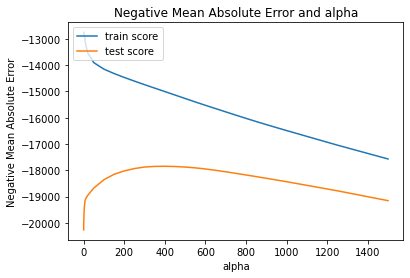

In [163]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 150, 200, 250, 300, 350,  400, 450, 500,550, 575, 600,650, 700, 750, 800, 850, 900, 950, 1000, 1250, 1500]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

plot_model_test_train_score(model_cv)

In [164]:
#Fitting Ridge model for alpha = 350 and printing coefficients which have been penalised
alpha = 400
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
metric_ridge = get_model_metrics(ridge)

Ridge(alpha=400)
R2 train:0.8950345173240554
R2 test:0.8478918292826052
RSS train:593872544273.9613
RSS test:294172313979.2147
MSE train:545337506.2203501
MSE test:810392049.5295172


In [165]:
print(sorted(list(zip(np.abs(ridge.coef_), housing_sales_data_temp.columns, ridge.coef_))))

[(0.0, 'Electrical_Mix', 0.0), (0.0, 'Exterior_CBlock', 0.0), (0.0, 'Exterior_Other', 0.0), (0.0, 'MiscFeature_Othr', 0.0), (0.0, 'Utilities_NoSeWa', 0.0), (0.13026914996755073, 'GarageType_Attchd', 0.13026914996755073), (6.262266710700682, 'MSSubClass_45', 6.262266710700682), (7.916390494937167, 'Exterior_Stone', -7.916390494937167), (22.050844099173723, 'Condition_PosN', -22.050844099173723), (31.111144702656766, 'Condition_RRNn', 31.111144702656766), (40.64259575475523, 'HouseStyle_2Story', 40.64259575475523), (41.69691994204033, 'MSSubClass_40', 41.69691994204033), (48.631459250577656, 'GarageQual', -48.631459250577656), (53.86324391359962, 'HouseStyle_SLvl', 53.86324391359962), (54.72685371130967, 'LandContour_Low', -54.72685371130967), (63.92574564386491, 'MSSubClass_70', -63.92574564386491), (65.37834725806708, 'Condition_RRAn', 65.37834725806708), (65.86339462873819, 'LotConfig_Inside', -65.86339462873819), (66.99997349297362, 'GarageType_CarPort', -66.99997349297362), (75.0749

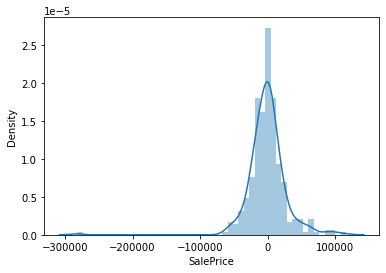

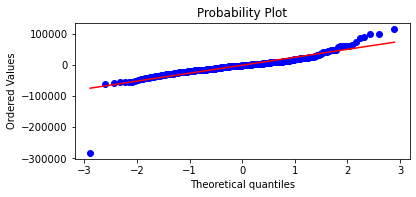

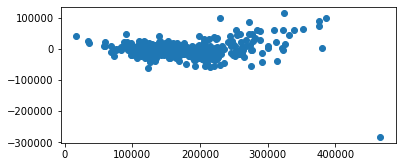

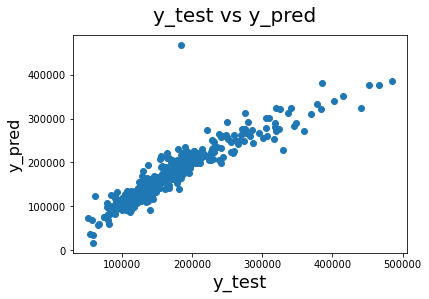

In [166]:
plot_residual_analysis(ridge)

## Lasso

Fitting 5 folds for each of 47 candidates, totalling 235 fits
{'alpha': 850}


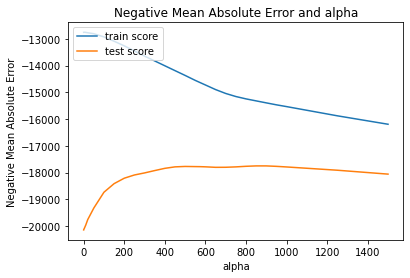

In [167]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

plot_model_test_train_score(model_cv)

In [168]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 850}


In [169]:
#Fitting Lasso model for alpha = 850 and printing coefficients which have been penalised

alpha =850

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)


lasso_metrics = get_model_metrics(lasso)

Lasso(alpha=850)
R2 train:0.8926685889542766
R2 test:0.8545109965154624
RSS train:607258467576.6555
RSS test:281371057266.17004
MSE train:557629446.8105193
MSE test:775126879.5211296


In [170]:
print(sorted(list(zip(np.abs(lasso.coef_), housing_sales_data_temp.columns, lasso.coef_))))

[(0.0, '2ndFlrSF', 0.0), (0.0, '3SsnPorch', 0.0), (0.0, 'Alley_NotApplicable', 0.0), (0.0, 'Alley_Pave', -0.0), (0.0, 'BedroomAbvGr', -0.0), (0.0, 'BldgType_2fmCon', -0.0), (0.0, 'BldgType_Duplex', 0.0), (0.0, 'BldgType_Twnhs', -0.0), (0.0, 'BldgType_TwnhsE', -0.0), (0.0, 'BsmtCond', -0.0), (0.0, 'BsmtExposure_Mn', 0.0), (0.0, 'BsmtFinSF1', 0.0), (0.0, 'BsmtFinSF2', 0.0), (0.0, 'BsmtFinType2', 0.0), (0.0, 'BsmtHalfBath', 0.0), (0.0, 'BsmtUnfSF', -0.0), (0.0, 'Condition_Norm', -0.0), (0.0, 'Condition_PosA', 0.0), (0.0, 'Condition_PosN', 0.0), (0.0, 'Condition_RRAn', 0.0), (0.0, 'Condition_RRNe', -0.0), (0.0, 'Condition_RRNn', 0.0), (0.0, 'Electrical_FuseF', -0.0), (0.0, 'Electrical_FuseP', -0.0), (0.0, 'Electrical_Mix', 0.0), (0.0, 'Electrical_SBrkr', -0.0), (0.0, 'EnclosedPorch', 0.0), (0.0, 'ExterCond', 0.0), (0.0, 'Exterior_AsbShng', -0.0), (0.0, 'Exterior_AsphShn', 0.0), (0.0, 'Exterior_BrkComm', 0.0), (0.0, 'Exterior_CBlock', 0.0), (0.0, 'Exterior_ImStucc', 0.0), (0.0, 'Exterior_Me

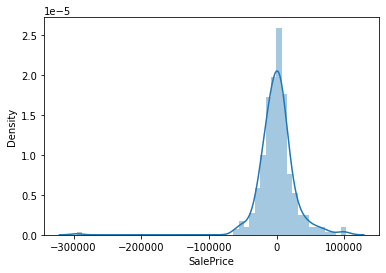

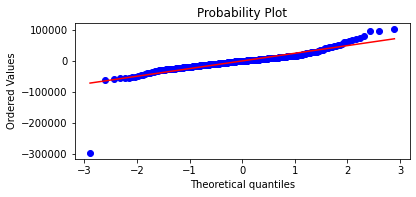

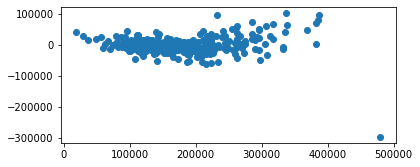

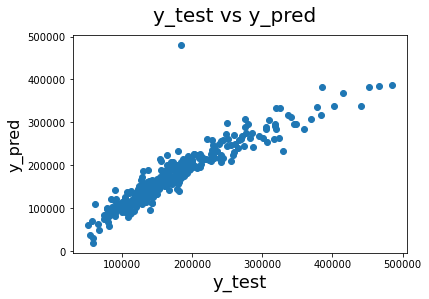

In [171]:
plot_residual_analysis(lasso)

## Model comparision

In [172]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotFrontage,-1207.001083484,-1204.593729199
LotArea,3283.109223228,3971.900030222
LotShape,-406.837522625,-0.000000000
OverallQual,8069.503855979,14060.695209040
OverallCond,2902.920614533,3006.084287709
YearBuilt,1271.590355901,0.000000000
YearRemodAdd,1326.854604966,0.000000000
MasVnrArea,3480.627026425,2289.011988875
ExterQual,3899.995835190,4105.203615480
ExterCond,147.219686720,0.000000000


In [186]:
betas = pd.DataFrame()#index=X.columns)
betas['Metric'] = ['R2 train','R2 test', 'RSS train', 'RSS test', 'MSE train', 'MSE test']
betas['Ridge'] = metric_ridge
betas['Lasso'] = lasso_metrics
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.9f}'.format)
betas

,Metric,Ridge,Lasso
0,R2 train,0.895034517,0.892668589
1,R2 test,0.847891829,0.854510997
2,RSS train,593872544273.961303711,607258467576.655517578
3,RSS test,294172313979.214721680,281371057266.170043945
4,MSE train,545337506.220350146,557629446.810519338
5,MSE test,810392049.529517174,775126879.521129608


#### Top 10 features in Ridge:

OverallQual, GrLivArea, Neighborhood_NridgHt, TotRmsAbvGrd, 1stFlrSF, KitchenQual, GarageCars, Neighborhood_StoneBr, Neighborhood_NoRidge, ExterQual

#### Top 10 features in Lasso:

GrLivArea, OverallQual, Neighborhood_NridgHt, GarageCars, SaleType_New, BldgTypeFloorsMap, KitchenQual, Neighborhood_StoneBr, Neighborhood_NoRidge, BsmtFinType1

#### Other observations:
- Lasso have made feature elimination/ feature selection where as Ridge didn't
- Based on metrics comparison for ridge and lasso, lasso has a good test score and MSE value also lasso does feature selection. Therefore for the current data & problem Lasso model is preferred.

## Linear regresssion assumptions validity
- Homoscedasticity: variance of residuals is within constant variance at every level.
- Error terms are normally distributed

# Assignment Part2

## 1. What happens when model coefficients are doubled?

In [174]:
#Fitting Ridge model for alpha = 2*400 and printing coefficients which have been penalised
alpha = 400*2
ridge_doubled = Ridge(alpha=alpha)

ridge_doubled.fit(X_train, y_train)
metric_ridge_doubled = get_model_metrics(ridge_doubled)

Ridge(alpha=800)
R2 train:0.8803886900121768
R2 test:0.8417403708696776
RSS train:676735543680.6764
RSS test:306069036864.92944
MSE train:621428414.7664614
MSE test:843165390.8124778


In [175]:
#Fitting Lasso model for alpha = 2*850 and printing coefficients which have been penalised
alpha = 1700
lasso_doubled = Lasso(alpha=alpha)

lasso_doubled.fit(X_train, y_train)
metric_lasso_doubled = get_model_metrics(lasso_doubled)

Lasso(alpha=1700)
R2 train:0.8765822892265333
R2 test:0.846407736288985
RSS train:698271355849.2854
RSS test:297042502135.673
MSE train:641204183.5163319
MSE test:818298903.955022


In [176]:
betas = pd.DataFrame()#index=X.columns)
betas['Metric'] = ['R2 train','R2 test', 'RSS train', 'RSS test', 'MSE train', 'MSE test']
betas['Ridge_400'] = metric_ridge
betas['Ridge_800'] = metric_ridge_doubled
betas['Lasso_850'] = lasso_metrics
betas['Lasso_1700'] = metric_lasso_doubled
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.9f}'.format)
betas

,Metric,Ridge_400,Ridge_800,Lasso_850,Lasso_1700
0,R2 train,0.895034517,0.880388690,0.892668589,0.876582289
1,R2 test,0.847891829,0.841740371,0.854510997,0.846407736
2,RSS train,593872544273.961303711,676735543680.676391602,607258467576.655517578,698271355849.285400391
3,RSS test,294172313979.214721680,306069036864.929443359,281371057266.170043945,297042502135.672973633
4,MSE train,545337506.220350146,621428414.766461372,557629446.810519338,641204183.516331911
5,MSE test,810392049.529517174,843165390.812477827,775126879.521129608,818298903.955021977


In [177]:
print(sorted(list(zip(np.abs(ridge_doubled.coef_), housing_sales_data_temp.columns, ridge_doubled.coef_))))

[(0.0, 'Electrical_Mix', 0.0), (0.0, 'Exterior_CBlock', 0.0), (0.0, 'Exterior_Other', 0.0), (0.0, 'MiscFeature_Othr', 0.0), (0.0, 'Utilities_NoSeWa', 0.0), (13.949920623263838, 'RoofMatl_Roll', 13.949920623263838), (17.845648564599312, 'Condition_RRAn', -17.845648564599312), (20.777138842901586, 'SaleType_CWD', -20.777138842901586), (21.229587403423075, 'BsmtFinType2', -21.229587403423075), (29.17709547322813, 'Neighborhood_NPkVill', 29.17709547322813), (29.713262731173103, 'Neighborhood_BrDale', -29.713262731173103), (35.6880263860774, 'MSZoning_RH', 35.6880263860774), (41.459751328351715, 'SaleCondition_Alloca', 41.459751328351715), (46.700608563727926, 'HouseStyle_1.5Unf', 46.700608563727926), (47.11265864233719, 'MSSubClass_45', -47.11265864233719), (49.67294848418164, 'SaleType_ConLD', 49.67294848418164), (50.73694083408023, 'MSSubClass_70', 50.73694083408023), (53.83332313653757, 'LotConfig_FR3', -53.83332313653757), (58.10867441404565, 'Condition_RRNn', 58.10867441404565), (58.3

In [178]:
print(sorted(list(zip(np.abs(lasso_doubled.coef_), housing_sales_data_temp.columns, lasso_doubled.coef_))))

[(0.0, '2ndFlrSF', 0.0), (0.0, '3SsnPorch', 0.0), (0.0, 'Alley_NotApplicable', 0.0), (0.0, 'Alley_Pave', -0.0), (0.0, 'BedroomAbvGr', -0.0), (0.0, 'BldgType_2fmCon', -0.0), (0.0, 'BldgType_Duplex', -0.0), (0.0, 'BldgType_Twnhs', -0.0), (0.0, 'BldgType_TwnhsE', -0.0), (0.0, 'BsmtCond', 0.0), (0.0, 'BsmtExposure_Mn', 0.0), (0.0, 'BsmtFinSF1', 0.0), (0.0, 'BsmtFinSF2', 0.0), (0.0, 'BsmtFinType2', 0.0), (0.0, 'BsmtHalfBath', 0.0), (0.0, 'BsmtUnfSF', -0.0), (0.0, 'Condition_Norm', -0.0), (0.0, 'Condition_PosA', 0.0), (0.0, 'Condition_PosN', 0.0), (0.0, 'Condition_RRAe', -0.0), (0.0, 'Condition_RRAn', 0.0), (0.0, 'Condition_RRNe', -0.0), (0.0, 'Condition_RRNn', 0.0), (0.0, 'Electrical_FuseF', -0.0), (0.0, 'Electrical_FuseP', -0.0), (0.0, 'Electrical_Mix', 0.0), (0.0, 'Electrical_SBrkr', 0.0), (0.0, 'EnclosedPorch', -0.0), (0.0, 'ExterCond', 0.0), (0.0, 'Exterior_AsbShng', -0.0), (0.0, 'Exterior_AsphShn', 0.0), (0.0, 'Exterior_BrkComm', -0.0), (0.0, 'Exterior_CBlock', 0.0), (0.0, 'Exterior_Hd

## Question 3: 
top 5 features are not available in lasso
GrLivArea, OverallQual, Neighborhood_NridgHt, GarageCars, SaleType_New

In [179]:
housing_sales_missing_features = housing_sales_data

In [180]:
housing_sales_missing_features.drop(['GrLivArea', 'OverallQual', 'Neighborhood_NridgHt', 'GarageCars', 'SaleType_New'], axis=1, inplace=True)

In [181]:

X = housing_sales_missing_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 35)

Fitting 5 folds for each of 47 candidates, totalling 235 fits
{'alpha': 150}


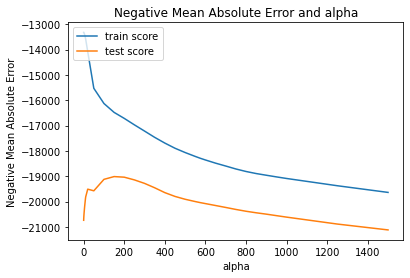

In [182]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

plot_model_test_train_score(model_cv)

In [183]:
#Fitting Lasso model for alpha = 150 and printing coefficients which have been penalised

alpha = 150

lasso_new = Lasso(alpha=alpha)
lasso_new.fit(X_train, y_train)


lasso_new_metrics = get_model_metrics(lasso_new)

Lasso(alpha=150)
R2 train:0.8801746392889175
R2 test:0.808490804605038
RSS train:677946597489.843
RSS test:370372629503.9258
MSE train:622540493.5627576
MSE test:1020310274.1154981


In [184]:
print(sorted(list(zip(np.abs(lasso_new.coef_), housing_sales_data_temp.columns, lasso_new.coef_))))

[(0.0, 'AgeRemod', -0.0), (0.0, 'Alley_NotApplicable', 0.0), (0.0, 'Alley_Pave', 0.0), (0.0, 'BldgType_2fmCon', 0.0), (0.0, 'BldgType_Duplex', 0.0), (0.0, 'BldgType_Twnhs', -0.0), (0.0, 'BldgType_TwnhsE', -0.0), (0.0, 'BsmtExposure_Mn', -0.0), (0.0, 'BsmtHalfBath', -0.0), (0.0, 'CentralAir_Y', 0.0), (0.0, 'Condition_Artery', -0.0), (0.0, 'Condition_Norm', -0.0), (0.0, 'Condition_PosA', 0.0), (0.0, 'Condition_PosN', -0.0), (0.0, 'Condition_RRAe', -0.0), (0.0, 'Condition_RRAn', 0.0), (0.0, 'Condition_RRNe', -0.0), (0.0, 'Condition_RRNn', 0.0), (0.0, 'Electrical_FuseF', 0.0), (0.0, 'Electrical_FuseP', -0.0), (0.0, 'Electrical_Mix', 0.0), (0.0, 'Exterior_AsbShng', -0.0), (0.0, 'Exterior_AsphShn', -0.0), (0.0, 'Exterior_BrkComm', 0.0), (0.0, 'Exterior_CBlock', 0.0), (0.0, 'Exterior_ImStucc', 0.0), (0.0, 'Exterior_Other', 0.0), (0.0, 'Exterior_Plywood', 0.0), (0.0, 'Exterior_Stone', -0.0), (0.0, 'Exterior_Stucco', -0.0), (0.0, 'Exterior_VinylSd', 0.0), (0.0, 'Exterior_Wd Sdng', -0.0), (0.0, 

In [185]:
Neighborhood_StoneBr, SaleCondition_Partial, RoofMatl_WdShngl, Neighborhood_Crawfor, Neighborhood_NoRidge

NameError: name 'Neighborhood_StoneBr' is not defined